In [13]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [34]:
CUDA = torch.cuda.is_available()

In [2]:
input_size = 784        #Number of input neurons (image pixels)
hidden_size = 400       #Number of hidden neurons
out_size = 10           #Number of classes (0-9) 
epochs = 10            #How many times we pass our entire dataset into our network 
batch_size = 100        #Input size of the data during one iteration 
learning_rate = 0.001   #How fast we are learning

In [5]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



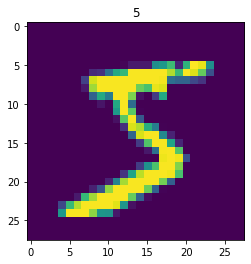

In [32]:
plt.imshow(train_dataset[0][0][0])
plt.title(train_dataset[0][1]);

In [57]:
class Model(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.init_weights()
        
    def init_weights(self):
        torch.nn.init.kaiming_normal_(self.fc1.weight)
        torch.nn.init.kaiming_normal_(self.fc2.weight)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [74]:
model = Model(input_size, hidden_size, out_size)

if CUDA:
    model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Load the data to your dataloader for batch processing and shuffling
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
criterion = nn.CrossEntropyLoss()

In [79]:
for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(batch_size,-1)
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predictions = torch.max(outputs,1)
        correct_train += (predictions == labels).sum()
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format
          (epoch+1, epochs, running_loss/len(train_loader), (100*correct_train.double()/len(train_dataset))))
    
print("DONE TRAINING!")

Epoch [1/10], Training Loss: 0.237, Training Accuracy: 93.152%
Epoch [2/10], Training Loss: 0.084, Training Accuracy: 97.483%
Epoch [3/10], Training Loss: 0.055, Training Accuracy: 98.223%
Epoch [4/10], Training Loss: 0.038, Training Accuracy: 98.762%
Epoch [5/10], Training Loss: 0.028, Training Accuracy: 99.077%
Epoch [6/10], Training Loss: 0.021, Training Accuracy: 99.350%
Epoch [7/10], Training Loss: 0.020, Training Accuracy: 99.278%
Epoch [8/10], Training Loss: 0.017, Training Accuracy: 99.433%
Epoch [9/10], Training Loss: 0.016, Training Accuracy: 99.437%
Epoch [10/10], Training Loss: 0.012, Training Accuracy: 99.588%
DONE TRAINING!


In [92]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [93]:
with torch.no_grad():
    correct_test = 0
    for (images, labels) in test_loader:
        images = images.view(batch_size,-1)
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        outputs = model(images)
        _, predictions = torch.max(outputs,1)
        correct_test += (predictions == labels).sum().item()
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct_test / len(test_dataset)))

Accuracy of the network on the 10000 test images: 98.01 %
